# Calculate CA with (ultra)microdisc electrodes

The class softpotato.Disc.CA() uses the equation reported by Perry, Al Shandoudi and Denuault:

Samuel C. Perry, Laila M. Al Shandoudi, and Guy Denuault. *Sampled-Current Voltammetry at Microdisk Electrodes: Kinetic Information from Pseudo Steady State Voltammograms*, Analytical Chemistry, 2014, 86 (19), 9917-9923. DOI: https://doi.org/10.1021/ac502645e

It assumes an ultramicrodisc electrode with hemispherical diffusion and a reduction reaction.

In [1]:
from softpotato import *
import softpotato as sp

### Define parameters:

In [13]:
a = 12.5e-4 # cm, electrode radius
DO = 1e-5 # cm2/s, diffusion coefficient of O
DR = 1e-5 # cm2/s, diffusion coefficient of R
CO = 1e-6 # mol/cm3, concentration of O
k0 = 5e-1 # cm/s, standard rate constant
alpha = 0.5 # transfer coefficient
E0 = 0 # V, standard potential

Es = -0.5 # V, step potential
ttot = 1 # s, total time
dt = 0.01 # s, time increment

### Generate CA potential waveform:

In [6]:
wf = sp.tech.Step(Es=Es, ttot=ttot, dt=dt)
t = wf.t
E = wf.E

### Calculate disc CA:

iLim = 4.82 nA


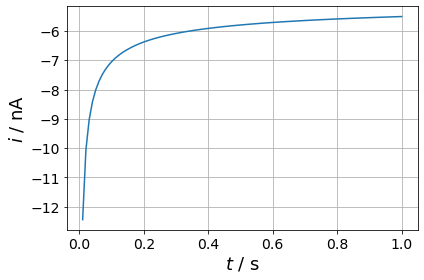

In [14]:
disc = sp.calc.MicroDisc(a=a, k0=k0, alpha=alpha, E0=E0, DO=DO, DR=DR, CO=CO)
i = disc.CA(t, Es)
iLim = disc.iLim
print('iLim = {:.2f} nA'.format(iLim*1e9))

sp.plot.plot(t, i*1e9, xlab='$t$ / s', ylab='$i$ / nA')

Iterate over *Es*:

/home/oliver/.local/lib/python3.9/site-packages/softpotato/calc.py:91: RuntimeWarning: divide by zero encountered in true_divide
  f1 = 1/np.sqrt(np.pi*s) + 1 + np.sqrt(s/(4*np.pi)) - 3*s/25 + 3*s**(3/2)/226
/home/oliver/.local/lib/python3.9/site-packages/softpotato/calc.py:92: RuntimeWarning: divide by zero encountered in true_divide
  f2 = 4/np.pi + 8/np.sqrt(s*np.pi**5) + 25/(2792*s**(3/2)) - 1/(3880*s**(5/2)) - 1/(4500*s**(7/2))
/home/oliver/.local/lib/python3.9/site-packages/softpotato/calc.py:92: RuntimeWarning: invalid value encountered in subtract
  f2 = 4/np.pi + 8/np.sqrt(s*np.pi**5) + 25/(2792*s**(3/2)) - 1/(3880*s**(5/2)) - 1/(4500*s**(7/2))


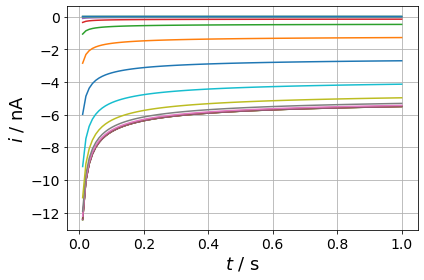

In [19]:
import numpy as np
Es = np.linspace(-0.3,0.3,21)
nE = np.size(Es)
nt = np.size(t)

i = np.zeros([nt, nE])
for x in range(nE):
    disc = sp.calc.MicroDisc(a=a, k0=k0, alpha=alpha, E0=E0, DO=DO, DR=DR, CO=CO)
    i[:,x] = disc.CA(t, Es[x])
    
sp.plot.plot(t, i*1e9, xlab='$t$ / s', ylab='$i$ / nA')